In [1]:
import os
import numpy as np
import csv
import datetime
import matplotlib
import matplotlib.pyplot as plt
import sys
import re

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [23]:
#path = '/Users/alihanks/class_data/period1/'
#path = '/Users/alihanks/class_data/period2/'
#path = '/Users/alihanks/class_data/period3/'
#path = '/Users/alihanks/class_data/period4/'
#path = '/Users/alihanks/class_data/period5/'
#path = '/Users/alihanks/class_data/period7/'
#path = '/Users/alihanks/class_data/test/'
path = '/Users/alihanks/class_data/Miramonte/period6/'

# CO<sub>2</sub> Data comparison

In [24]:
in_file_IDs = []
in_means = []
in_errs = []
in_groups = []

out_file_IDs = []
out_means = []
out_errs = []
out_groups = []

test_file_IDs = []
test_means = []
test_errs = []
test_groups = []

for filename in sorted(os.listdir(path)):
    file_ID = re.match( r'(.*)_(.*)_(.*)_2019.*', filename, re.M)
    if re.search( r'CO2', filename, re.M):
        with open(path+'/'+filename,'r') as f:
            if re.search( r'Inside', filename, re.M):
                in_file_IDs.append(file_ID.group(3))
                reader = csv.reader(f)
                data = []
                for row in reader:
                    try:
                        data.append(float(row[1]))
                    except Exception as e:
                        #print(e)
                        pass
                in_groups.append(data)
                in_means.append(np.mean(np.array(data)))
                in_errs.append(np.std(np.array(data)))
            if re.search( r'Outside', filename, re.M):
                out_file_IDs.append(file_ID.group(3))
                reader = csv.reader(f)
                data = []
                for row in reader:
                    try:
                        data.append(float(row[1]))
                    except Exception as e:
                        #print(e)
                        pass
                out_groups.append(data)
                out_means.append(np.mean(np.array(data)))
                out_errs.append(np.std(np.array(data)))
            if re.search( r'Test', filename, re.M):
                test_file_IDs.append(file_ID.group(3))
                reader = csv.reader(f)
                data = []
                for row in reader:
                    try:
                        data.append(float(row[1]))
                    except Exception as e:
                        #print(e)
                        pass
                test_groups.append(data)
                test_means.append(np.mean(np.array(data)))
                test_errs.append(np.std(np.array(data)))

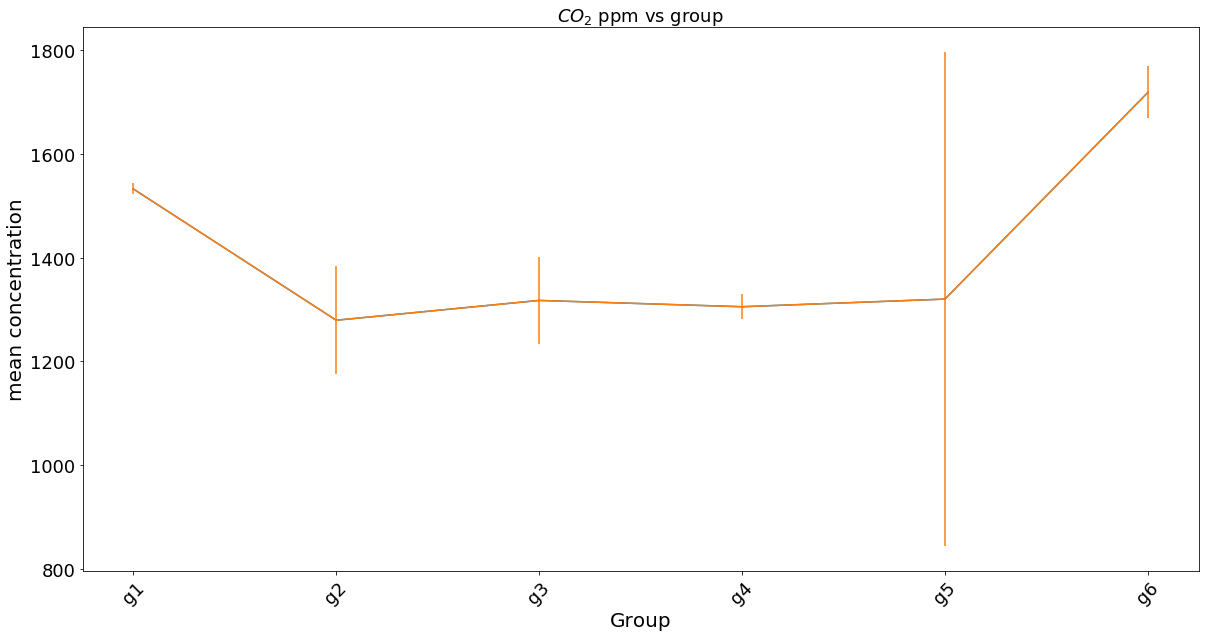

In [25]:
plt.figure(figsize=(20,10))
plt.plot(in_file_IDs, in_means)
plt.errorbar(in_file_IDs, in_means, in_errs)

plt.xlabel('Group')
plt.xticks(rotation=45)
plt.ylabel('mean concentration')

plt.title('$CO_2$ ppm vs group')

plt.show()

## Indoor CO<sub>2</sub> levels for all groups

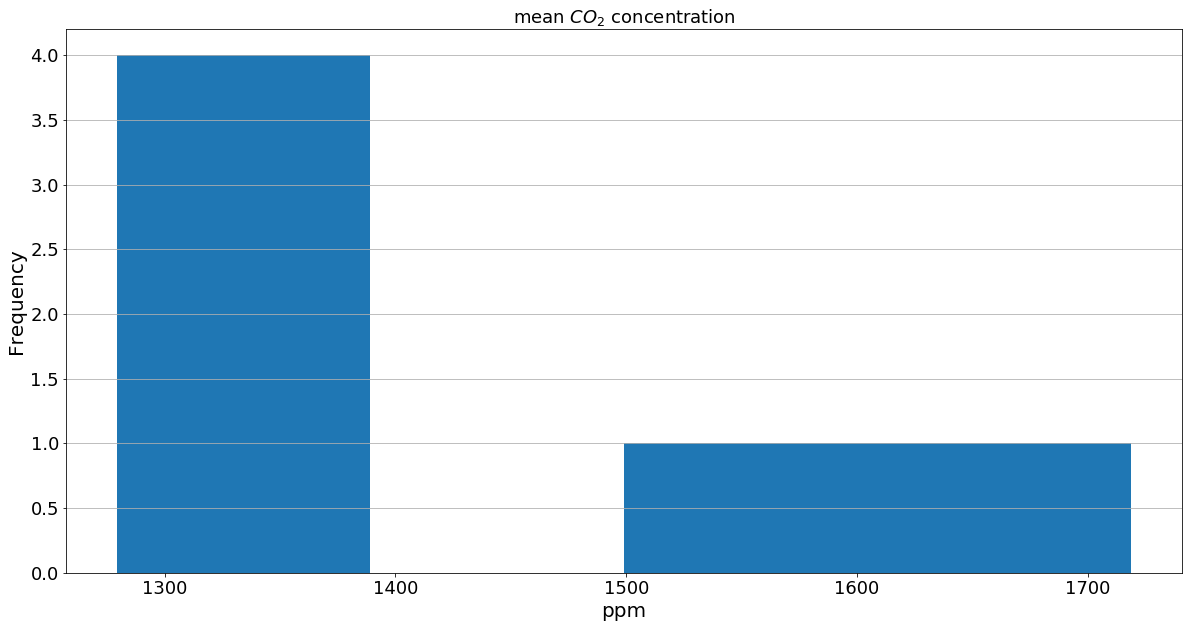

In [26]:
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(x=in_means, bins='auto')
plt.grid(axis='y')
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.title('mean $CO_2$ concentration')
plt.show()

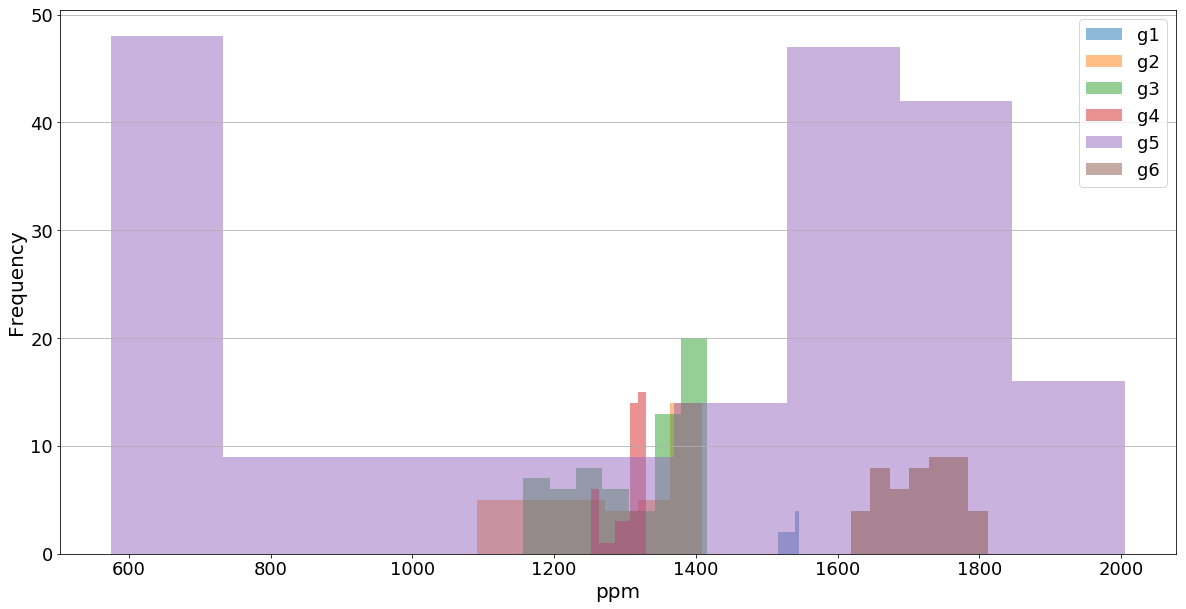

In [27]:
plt.figure(figsize=(20,10))
for i in range(len(in_groups)):
    n, bins, patches = plt.hist(x=in_groups[i], bins='auto', alpha=0.5, label=in_file_IDs[i])
plt.grid(axis='y')
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

## Location comparison

In [36]:
group_ID = 2
test_location = 'Test'

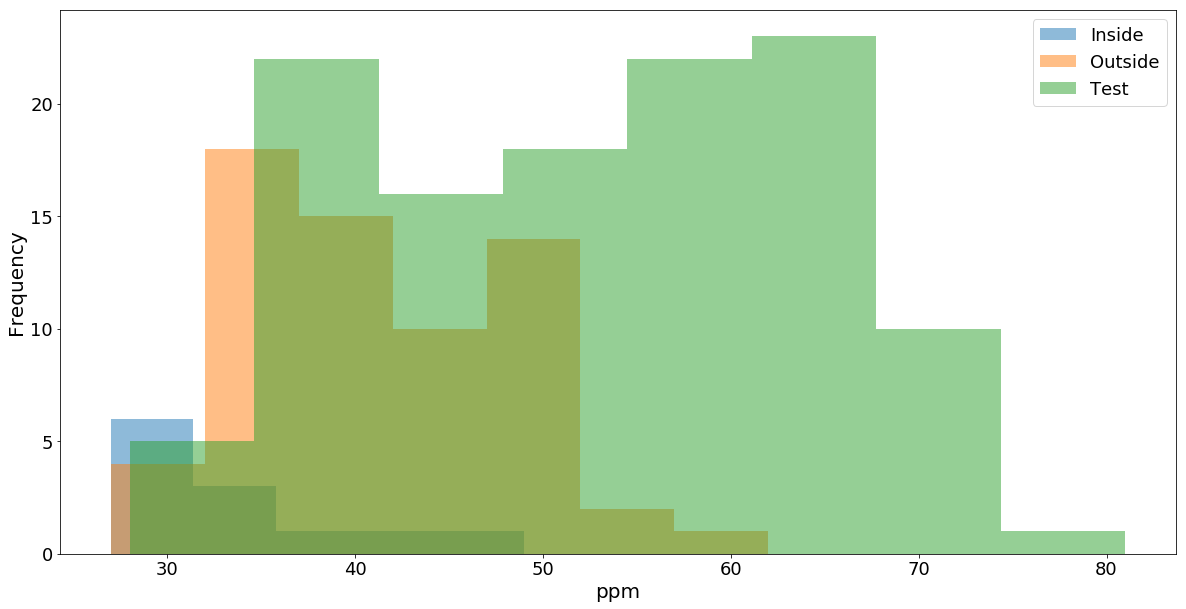

In [37]:
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(x=in_groups[group_ID-1], bins='auto', alpha=0.5, label='Inside')
n, bins, patches = plt.hist(x=out_groups[group_ID-1], bins='auto', alpha=0.5, label='Outside')
n, bins, patches = plt.hist(x=test_groups[group_ID-1], bins='auto', alpha=0.5, label=test_location)
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Background radiation comparisons

In [30]:
in_file_IDs = []
in_means = []
in_errs = []
in_groups = []

out_file_IDs = []
out_means = []
out_errs = []
out_groups = []

test_file_IDs = []
test_means = []
test_errs = []
test_groups = []

for filename in sorted(os.listdir(path)):
    file_ID = re.match( r'(.*)_(.*)_(.*)_2019.*', filename, re.M)
    if re.search( r'D3S', filename, re.M):
        try:
            spectra = np.genfromtxt(path+'/'+filename, delimiter= ",").T
        except:
            pass
        #print(np.sum(spectra, axis=0))
        if len(spectra)==0:
            continue
        if re.search( r'Inside', filename, re.M):
            in_file_IDs.append(file_ID.group(3))
            in_groups.append(np.sum(spectra, axis=0))
            in_means.append(np.sum(spectra)/len(np.sum(spectra, axis=0)))
            in_errs.append(np.sqrt(np.sum(spectra))/len(np.sum(spectra, axis=0)))
        if re.search( r'Outside', filename, re.M):
            out_file_IDs.append(file_ID.group(3))
            out_groups.append(np.sum(spectra, axis=0))
            out_means.append(np.sum(spectra)/len(np.sum(spectra, axis=0)))
            out_errs.append(np.sqrt(np.sum(spectra))/len(np.sum(spectra, axis=0)))
        if re.search( r'Test', filename, re.M):
            test_file_IDs.append(file_ID.group(3))
            test_groups.append(np.sum(spectra, axis=0))
            test_means.append(np.sum(spectra)/len(np.sum(spectra, axis=0)))
            test_errs.append(np.sqrt(np.sum(spectra))/len(np.sum(spectra, axis=0)))

## Background radiation levels for all groups

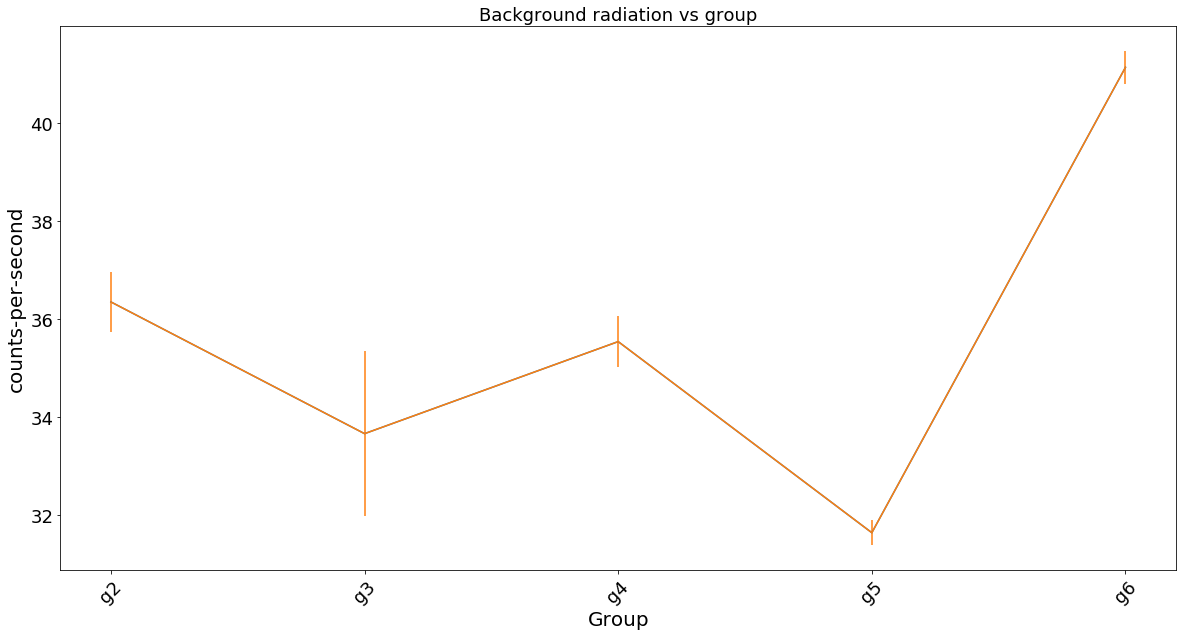

In [31]:
plt.figure(figsize=(20,10))
plt.plot(in_file_IDs, in_means)
plt.errorbar(in_file_IDs, in_means, in_errs)

plt.xlabel('Group')
plt.xticks(rotation=45)
plt.ylabel('counts-per-second')

plt.title('Background radiation vs group')

plt.show()

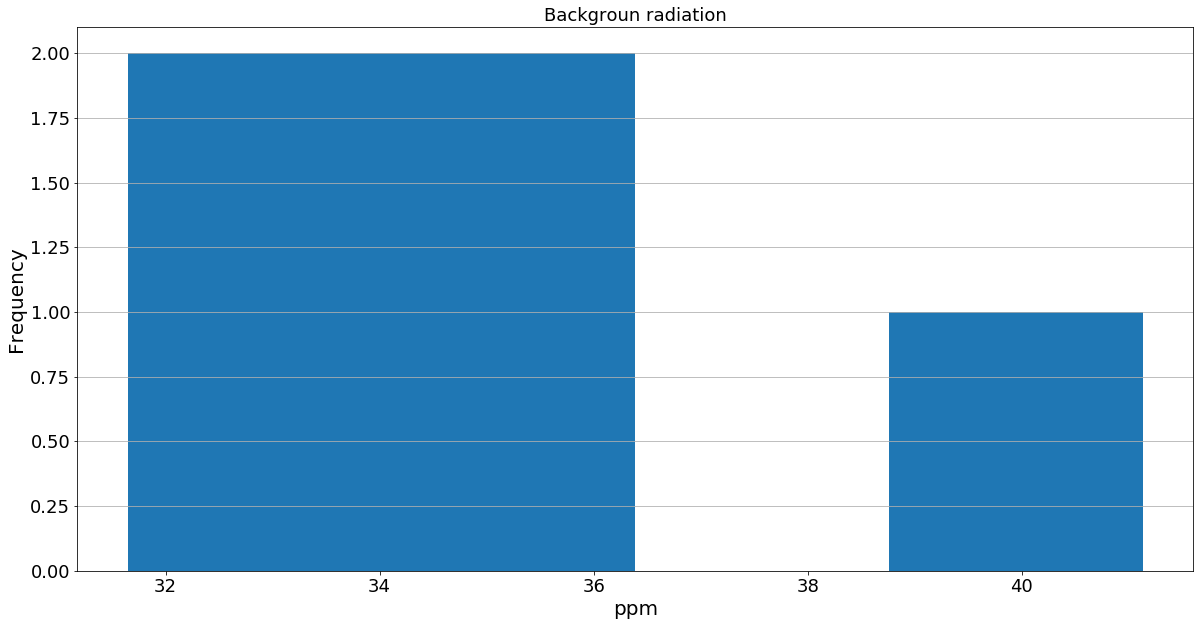

In [32]:
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(x=in_means, bins='auto')
plt.grid(axis='y')
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.title('Backgroun radiation')
plt.show()

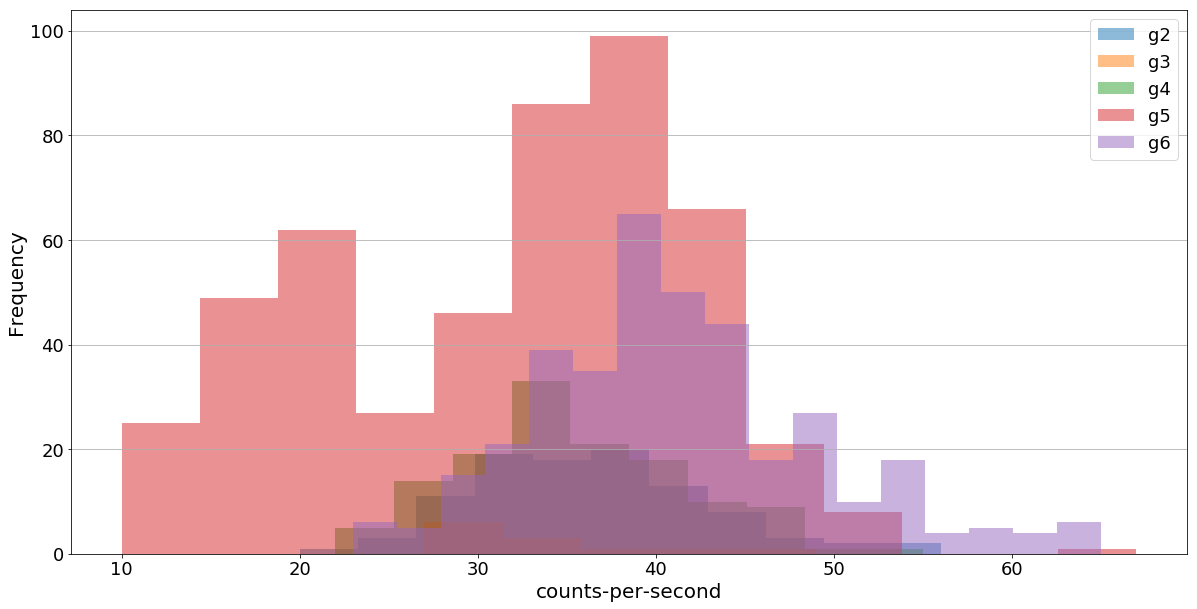

In [33]:
plt.figure(figsize=(20,10))
for i in range(len(in_groups)):
    n, bins, patches = plt.hist(x=in_groups[i], bins='auto', alpha=0.5, label=in_file_IDs[i])
plt.grid(axis='y')
plt.xlabel('counts-per-second')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

## Location comparison

In [40]:
group_ID = 2
test_location = 'Test'

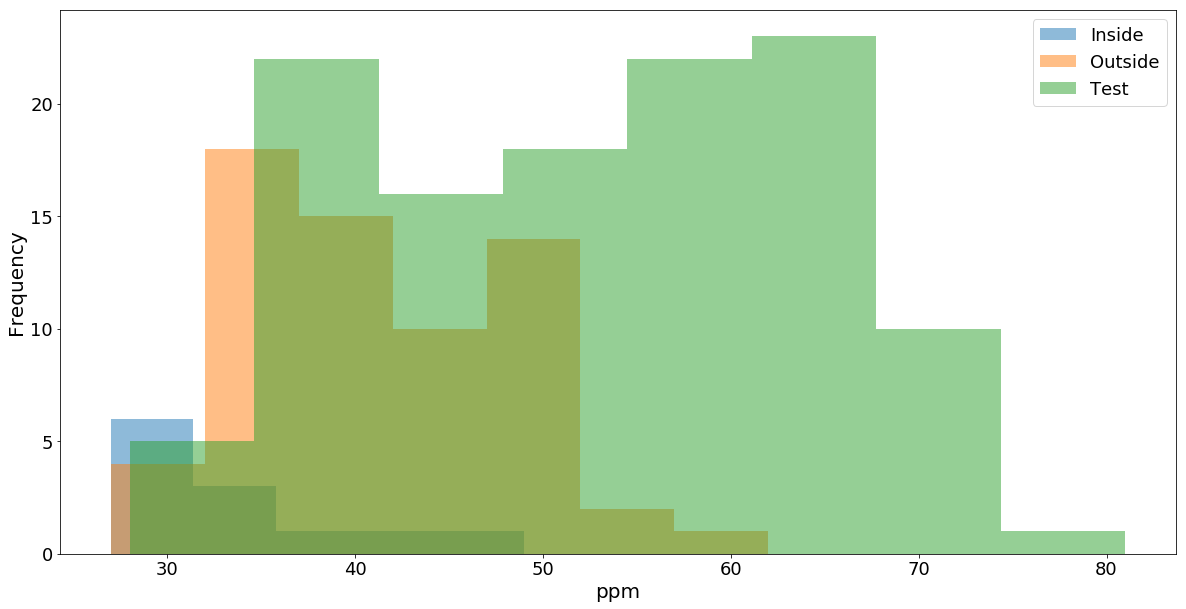

In [41]:
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(x=in_groups[group_ID-1], bins='auto', alpha=0.5, label='Inside')
n, bins, patches = plt.hist(x=out_groups[group_ID-1], bins='auto', alpha=0.5, label='Outside')
n, bins, patches = plt.hist(x=test_groups[group_ID-1], bins='auto', alpha=0.5, label=test_location)
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.legend(loc='upper right')